 # 10.04.2025 ML Lab / Gradient Boosting


 Imports


In [2]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Diabetes Data

In [12]:
data = pd.read_csv('diabetes.csv')
data.dropna(inplace=True)
X = pd.get_dummies(data)
y = X['Outcome']
X.drop(['Outcome'], axis=1, inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
def model1(x,y,z):
  model = XGBClassifier(n_estimators=10, max_depth=5, learning_rate=0.1)
  return model

# Suggested HyperParams
n_estimators = [1000,500,100,50,10]
max_depth = [5,10,20]
learning_rate = [0.8,0.1,0.01]

In [16]:
X = X.iloc[:, :-1]
Y = y
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (537, 5)
Shape of X_test: (231, 5)


In [52]:
best_model = None
best_score = None

for i in n_estimators:
  for j in max_depth:
    for k in learning_rate:
      model = model1(i,j,k)
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      model_score = accuracy_score(y_test, y_pred)
      print("Accuracy of XGB Classifier: {0:0.2f}".format(model_score * 100.0))
      confusion_matrix(y_pred, y_test)
      y_pred = model.predict(X_train)
      model_score = accuracy_score(y_train, y_pred)
      print("Accuracy of XGB Classifier: {0:0.2f}".format(model_score * 100.0))
      confusion_matrix(y_pred, y_train)
      if best_score is None or model_score > best_score:
        best_score = model_score
        best_model = model

model = best_model
model_score = best_score

Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XGB Classifier: 79.63
Accuracy of XGB Classifier: 42.55
Accuracy of XG

In [53]:
y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
print("Accuracy of XGB Classifier: {0:0.2f}".format(model_score * 100.0))
confusion_matrix(y_pred, y_test)

Accuracy of XGB Classifier: 42.55


array([[15, 24],
       [ 3,  5]])

In [54]:
y_pred = model.predict(X_train)
model_score = accuracy_score(y_train, y_pred)
print("Accuracy of XGB Classifier: {0:0.2f}".format(model_score * 100.0))
confusion_matrix(y_pred, y_train)

Accuracy of XGB Classifier: 79.63


array([[72, 22],
       [ 0, 14]])

<Figure size 640x480 with 0 Axes>

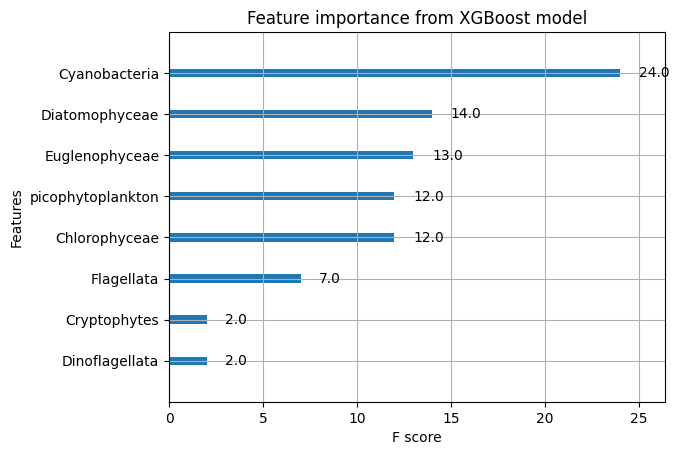

In [55]:
from xgboost import XGBClassifier, plot_importance, to_graphviz
plt.figure()
plot_importance(model, title="Feature importance from XGBoost model")
plt.show()

vlaPhytoBasin


In [33]:
data = pd.read_csv('vlaPhytoBasin.csv')
data.dropna(inplace=True)

X = pd.get_dummies(data)
y = X['Basin']
X.drop(['Basin'], axis=1, inplace=True)

In [35]:
X = pd.get_dummies(data)
y = X['Basin']
X.drop(['Basin'], axis=1, inplace=True)
data.head()

,Cyanobacteria,Chlorophyceae,Euglenophyceae,Diatomophyceae,Flagellata,Dinoflagellata,Cryptophytes,picophytoplankton,Basin
0,2.35,3.08,0.92,0.23,0.00,0.0,0.00,3.20,0
1,6.39,2.87,0.49,0.01,0.00,0.0,0.00,2.42,0
2,2.05,7.47,0.00,0.06,0.17,0.0,0.00,2.61,0
3,6.30,5.03,0.00,0.11,0.10,0.0,0.00,2.49,0
4,3.77,5.69,0.00,0.01,0.04,0.0,0.02,1.73,0


In [36]:
X = X.iloc[:, :-1]
Y = y
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (108, 7)
Shape of X_test: (47, 7)


In [37]:
model = XGBClassifier(n_estimators=10, max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [38]:
y_pred = model.predict(X_test)
model_score = accuracy_score(y_test, y_pred)
print("Accuracy of XGB Classifier: {0:0.2f}".format(model_score * 100.0))
confusion_matrix(y_pred, y_test)

Accuracy of XGB Classifier: 65.96


array([[21, 11],
       [ 5, 10]])

In [39]:
y_pred = model.predict(X_train)
model_score = accuracy_score(y_train, y_pred)
print("Accuracy of XGB Classifier: {0:0.2f}".format(model_score * 100.0))
confusion_matrix(y_pred, y_train)

Accuracy of XGB Classifier: 87.96


array([[63, 12],
       [ 1, 32]])

<Figure size 640x480 with 0 Axes>

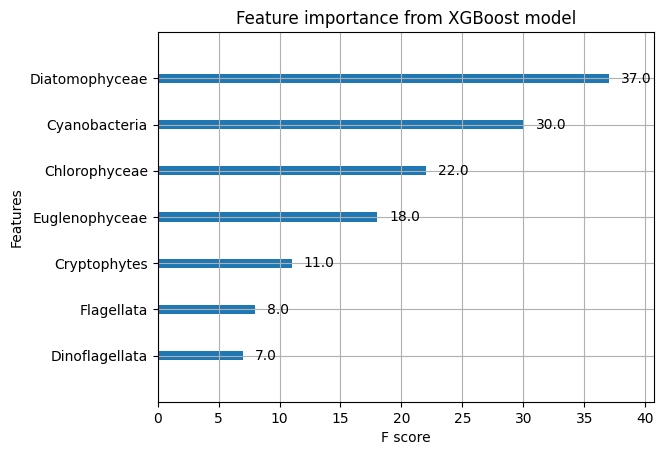

In [40]:
from xgboost import XGBClassifier, plot_importance, to_graphviz
plt.figure()
plot_importance(model, title="Feature importance from XGBoost model")
plt.show()